In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolorsx
import os
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS

from reproject import reproject_exact

from AstroColour.AstroColour import RGB

%matplotlib widget

In [2]:
files = ['i', 'r', 'g']
f_files = []
wcs_list = []

i = 0
for f in files:
    file = f'/Users/zgl12/Python_Scripts/Image_Processing/ygp/2023ygp-0011_{f}_wcs.fits.gz'

    hdu = fits.open(file)
    image_data = hdu[0].data - 500
    wcs = WCS(hdu[0].header)
    
    if i == 0:
        wcs_list.append(wcs)
        hdu.close()
        i += 1
    
    else:
        hdu.close()
        
        image_data, _ = reproject_exact((image_data, wcs), wcs_list[0])
        
    # plt.figure()
    # plt.imshow(image_data, vmin = np.nanpercentile(image_data, 5), vmax = np.nanpercentile(image_data, 95))
    # plt.show()

    f_files.append(image_data)
    

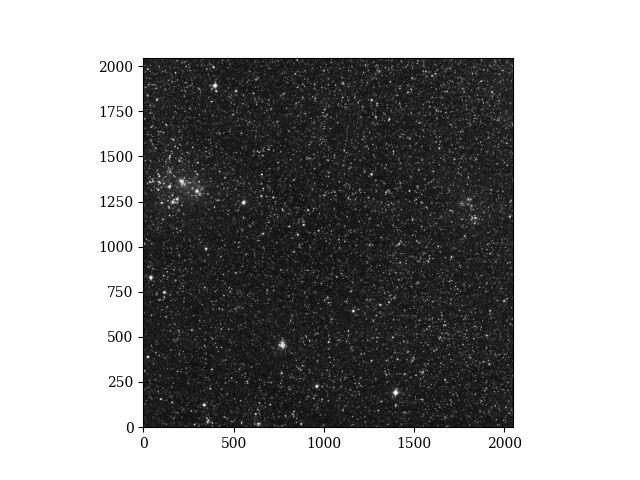

In [3]:
plt.figure()
plt.imshow(f_files[0], origin='lower', vmin = np.nanpercentile(f_files[0], 1), vmax = np.nanpercentile(f_files[0], 99), cmap= 'gray')
plt.show()

In [4]:
rgb = RGB(f_files,
          save = False, save_name = 'test', save_folder = '/Users/zgl12/', 
          epsf_plot=False, epsf = True,
          bkg_plot = False, temp_save = True, run = True)
# colour_image = rgb.plot()

__tmp_residuals 2.4417314529418945
__tmp_residuals 1.5522438287734985
__tmp_residuals 1.5355042219161987


In [5]:
calib_images = rgb.calib_images
diff_images = rgb.diff_images

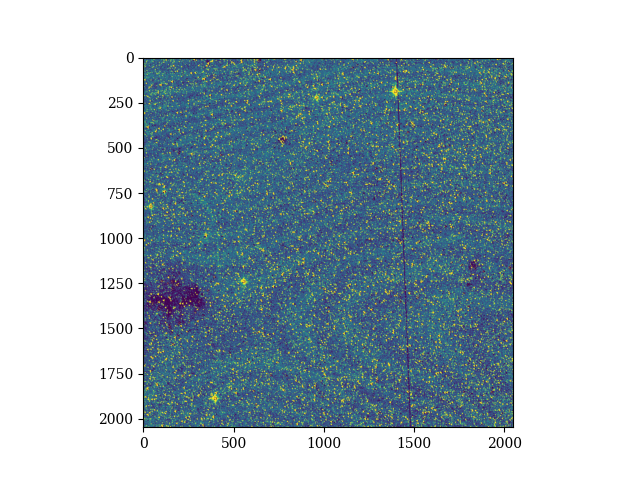

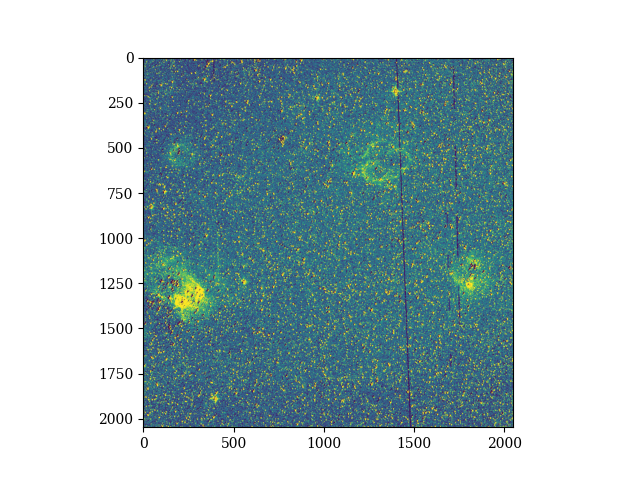

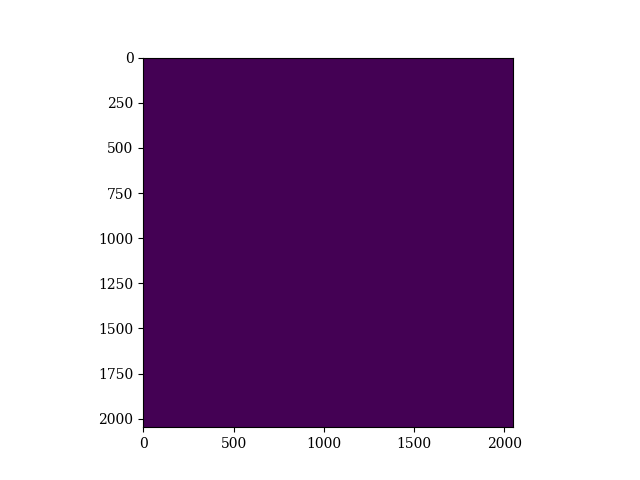

In [6]:
for i in range(len(diff_images)):
    plt.figure()
    plt.imshow(diff_images[i], vmin = np.nanpercentile(diff_images[i], 5), vmax = np.nanpercentile(diff_images[i], 95))
    plt.show()

In [7]:
calib_images

[array([[-0.0229902 ,  2.0019212 ,  1.6266325 , ...,  3.2233038 ,
          9.780306  , 10.452794  ],
        [ 1.8524755 ,  3.2112446 ,  2.6281927 , ...,  4.416344  ,
         13.000886  , 14.443102  ],
        [ 0.82243615,  3.0441916 ,  1.5968736 , ...,  4.571119  ,
         11.636752  , 12.852686  ],
        ...,
        [ 1.0773351 , -0.12463873,  0.35017323, ..., 10.002166  ,
          8.019084  ,  5.6296415 ],
        [ 1.8564678 , -0.261286  ,  0.3278326 , ..., 10.219764  ,
          5.8123507 ,  2.2242308 ],
        [ 4.0453715 ,  2.5830762 ,  1.7760198 , ...,  6.835579  ,
          2.4292321 , -0.62450355]], dtype=float32),
 array([[-2.6475608 , -3.3362134 , -2.1191053 , ...,  0.196802  ,
          3.4641342 ,  3.4355795 ],
        [-2.3057737 , -2.9680903 , -2.8296096 , ..., -0.7680936 ,
          6.119508  ,  6.207561  ],
        [ 0.50902   , -1.4114747 , -4.008392  , ..., -2.4927707 ,
          3.5363533 ,  4.98725   ],
        ...,
        [-1.5856129 , -1.6400565 ,  1.7

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.8541127618981879].


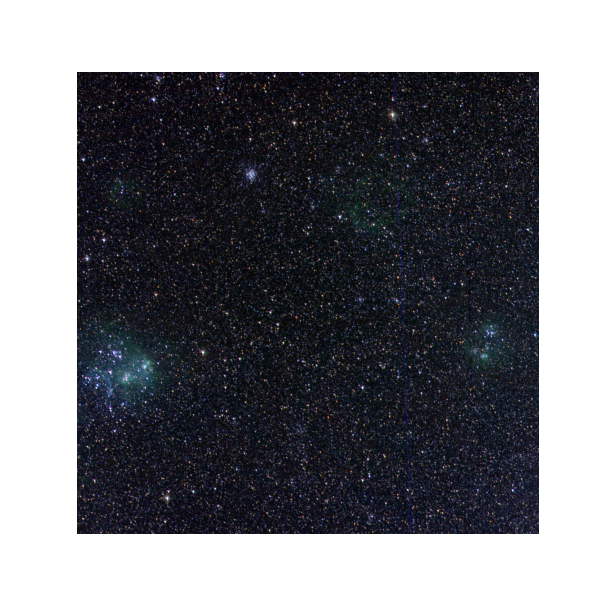

In [6]:
colour = rgb.master_plot(calib_images, 
                         colours = ['red', 'green', 'blue'], 
                         intensities = [0.55, 1, 0.55], 
                         gamma = [1.2, 1.2, 1.2],
                         norms = ['asinh', 'asinh', 'asinh'], 
                         uppers = [99, 99, 99],
                         lowers = [5, 5, 5], 
                         interactive=True)

In [ ]:
for i in range(len(calib_images)):
    
    data = calib_images[i] - calib_images[0]
    plt.figure()
    plt.imshow(data, vmin = np.nanpercentile(data, 5), vmax = np.nanpercentile(data, 95))
    plt.show()

In [ ]:
from astropy.io import fits
from astropy.table import Table

tpf = '/Users/zgl12/ktwo211400219-c16_lpd-targ.fits.gz'

hdu = fits.open(tpf)

data = hdu['TARGETTABLES'].data
hdu.info()
hdu.close()

# hdu.flux

In [ ]:
data['FLUX'].shape

In [ ]:
# rgb = RGB(f_files, 
#           colours = ['red', 'green', 'blue'], intensities = [0.55, 1, 0.6], 
#           uppers = [99, 99, 99], lowers = [5, 5, 5], 
#           save = False, save_name = 'test', save_folder = '/Users/zgl12/', 
#           gamma = 0.5, norm = 'asinh', min_separation = 29, star_size = 5, epsf_plot=False,)
# colour_image = rgb.plot()

In [8]:
len(calib_images)

3